# Mini Project on Descriptive Analytics using file handling 

1. **Descriptive Analysis**

`Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?`

`Identify the top 10 most-rated movies`


2. **Genre Insights**

`Which movie genres are the most frequently rated?`

`Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

3. **User Engagement Analysis**

`Identify the most active users (profession) based on the number of ratings they’ve given.`

`Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


4. **Rating Distribution by Demographics**

`Investigate how ratings vary by user demographic attributes (age, gender, occupation).`

`Are there specific genres preferred by certain age groups or occupations?`


5. **Top Performers**

`Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

`Analyze the characteristics of top-rated movies (e.g., release year, genres).`


6. **Exploring Long Tail**

`Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

`What are the characteristics of these less-rated movies compared to popular ones?`


7. **Tag Analysis**

`Analyze the tags associated with movies. What are the most frequently used tags?`

`Are tags consistent with movie genres?`

## You can do for self learning

8. **Visualization Projects**

`Create dashboards to visualize:`

`The distribution of ratings by genres and years.`

`Popular genres by user demographics.`

`Heatmaps showing the correlation between genres, user activity, and ratings`

In [1]:
# First Solution - Descriptive Analysys

ratings = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:   #movie_id = number of times movie  is present in file
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:   # rating = number 
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}%'.format(rating_range, round((rating_distribution[rating_range] / sum(rating_distribution.values()) * 100), 2)))

movies = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22.63%
Medium 61.0%
Low 16.37%
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [2]:
# Genre Insights

ratings = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
movieid_count = dict()
rating_sum = dict()
for line in ratings:
    line = line.strip()
    user_id, movie_id, rating, _ = map(int, line.split('::'))
    if movie_id in movieid_count:   #movie_id = number of times movie is present in file
        movieid_count[movie_id] += 1
    else: 
        movieid_count[movie_id] = 1
        
    if movie_id in rating_sum:   
        rating_sum[movie_id] += rating
    else: 
        rating_sum[movie_id] = rating
    
ratings.close()

movies = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat')
movie_genre = dict()
genre_rating = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieid = int(columns[0])
    genres = columns[2].split('|')
    
    for genre in genres:
        if genre not in genre_rating:
            genre_rating[genre] = 0
        if genre not in movie_genre:
            movie_genre[genre] = 0
        if movieid in rating_sum:
            genre_rating[genre] += rating_sum[movieid]
        if movieid in movieid_count:
            movie_genre[genre] += movieid_count[movieid]      
movies.close()

genre_avg_rating = dict()
for genre in genre_rating:
    if movie_genre[genre] > 0:  
        genre_avg_rating[genre] = round(genre_rating[genre] / movie_genre[genre], 2)

print("\nMost Frequently Rated Movie Genres:")
sorted_genres = sorted(movie_genre.items(), key=lambda x: x[1], reverse=True)
for genre, count in sorted_genres:
    print(f"{genre}: {count} ratings")

print("\nAverage Ratings by Genre:")
sorted_avg_ratings = sorted(genre_avg_rating.items(), key=lambda x: x[1], reverse=True)
for genre, avg_rating in sorted_avg_ratings:
    print(f"{genre}: {avg_rating}")



Most Frequently Rated Movie Genres:
Comedy: 356580 ratings
Drama: 354529 ratings
Action: 257457 ratings
Thriller: 189680 ratings
Sci-Fi: 157294 ratings
Romance: 147523 ratings
Adventure: 133953 ratings
Crime: 79541 ratings
Horror: 76386 ratings
Children's: 72186 ratings
War: 68527 ratings
Animation: 43293 ratings
Musical: 41533 ratings
Mystery: 40178 ratings
Fantasy: 36301 ratings
Western: 20683 ratings
Film-Noir: 18261 ratings
Documentary: 7910 ratings

Average Ratings by Genre:
Film-Noir: 4.08
Documentary: 3.93
War: 3.89
Drama: 3.77
Crime: 3.71
Animation: 3.68
Musical: 3.67
Mystery: 3.67
Western: 3.64
Romance: 3.61
Thriller: 3.57
Comedy: 3.52
Action: 3.49
Adventure: 3.48
Sci-Fi: 3.47
Fantasy: 3.45
Children's: 3.42
Horror: 3.22


In [3]:
# User Engagement Analysis

ratings = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
userid_count = dict()
user_rating = dict()
for line in ratings:
    line = line.strip()
    user_id, movie_id, rating, _ = map(int, line.split('::'))
    if user_id in userid_count:   
        userid_count[user_id] += 1
    else: 
        userid_count[user_id] = 1
    if user_id in user_rating:   
        user_rating[user_id] += rating
    else: 
        user_rating[user_id] = rating
        
#print(sorted_userid_count)
ratings.close()

users = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\users.dat')
demographic = dict()
profession_codes = dict()

profession_codes = {
    0: 'other',
    1: 'academic/educator',
    2: 'artist',
    3: 'clerical/admin',
    4: 'college/grad student',
    5: 'customer service',
    6: 'doctor/healthcare',
    7: 'executive/managerial',
    8: 'farmer',
    9: 'homemaker',
    10: 'K-12 student',
    11: 'lawyer',
    12: 'programmer',
    13: 'retired',
    14: 'sales/marketing',
    15: 'scientist',
    16: 'self-employed',
    17: 'technician/engineer',
    18: 'tradesman/craftsman',
    19: 'unemployed',
    20: 'writer'
}

age_groups = dict()
age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}
for line in users:
    line = line.strip()
    user_id, gender, age, occupation, zipcode = line.split('::')
    demographic[int(user_id)] = {'gender':gender, 'age':age_groups[int(age)], 'occupation':profession_codes[int(occupation)]}

for userid, ratings in user_rating.items():
    if(userid in demographic):
        demographic[userid]['ratings'] = ratings

for userid, count in userid_count.items():
    if(userid in demographic):
        demographic[userid]['movies_rated'] = count
#print(demographic)

profession_rating = dict()
age_rating = dict()
for userid in demographic:
    profession = demographic[userid]['occupation']
    age = demographic[userid]['age']
    ratings = demographic[userid]['ratings']
    if profession in profession_rating:
        profession_rating[profession] += ratings
    else:
        profession_rating[profession] = ratings

    if age in age_rating:
        age_rating[age] += ratings
    else:
        age_rating[age] = ratings

#print(profession_rating)
sorted_professions = sorted(profession_rating.items(), key = lambda x:x[1], reverse = True)
print("Ratings by Occupation:")
for occupation, total_ratings in sorted_professions:
    print(f"{occupation}: {total_ratings} ratings")

sorted_age = sorted(age_rating.items(), key = lambda x:x[1], reverse = True)
print("\nRatings by age:")
for age, total_ratings in sorted_age:
    print(f"{age}: {total_ratings} ratings")
    
gender_ratings = {'M': 0, 'F': 0}
gender_user_count = {'M': 0, 'F': 0}
gender_movies = {'M': 0, 'F': 0}

for userid, user_data in demographic.items():
     gender = user_data['gender']
     gender_ratings[gender] += user_data['ratings']
     gender_movies[gender] += user_data['movies_rated']
     gender_user_count[gender] += 1

print("\nRatings by Gender:")
for gender, total_ratings in gender_ratings.items() :
    print(f"{gender}: {total_ratings} ratings")
    
gender_avg_rating = {'M': 0, 'F': 0}
for gender in gender_ratings:
    gender_avg_rating[gender] = round(gender_ratings[gender] / gender_movies[gender] , 2)

print("\nMovies watched by Gender:")
for gender, total_ratings in gender_movies.items() :
    print(f"{gender}: {total_ratings} movies")
    
print("\nNumber of user to give rating according to gender:")
for gender, ratings in gender_user_count.items() :
    print(f"{gender}: {ratings} users")
    
print("\nAverage rating by Gender:")
for gender, total_ratings in gender_avg_rating.items() :
    print(f"{gender}: {total_ratings} ratings")

Ratings by Occupation:
college/grad student: 463433 ratings
other: 461646 ratings
executive/managerial: 379506 ratings
academic/educator: 305270 ratings
technician/engineer: 263126 ratings
writer: 211232 ratings
programmer: 209060 ratings
artist: 178897 ratings
sales/marketing: 177700 ratings
self-employed: 165518 ratings
doctor/healthcare: 136229 ratings
clerical/admin: 115630 ratings
scientist: 84684 ratings
K-12 student: 82276 ratings
customer service: 77295 ratings
lawyer: 74384 ratings
retired: 52014 ratings
unemployed: 50883 ratings
tradesman/craftsman: 42665 ratings
homemaker: 41484 ratings
farmer: 9381 ratings

Ratings by age:
25-34: 1402339 ratings
35-44: 720025 ratings
18-24: 643766 ratings
45-49: 304262 ratings
50-55: 269265 ratings
56+: 146070 ratings
Under 18: 96586 ratings

Ratings by Gender:
M: 2690110 ratings
F: 892203 ratings

Movies watched by Gender:
M: 753769 movies
F: 246440 movies

Number of user to give rating according to gender:
M: 4331 users
F: 1709 users

Ave

In [4]:
# Rating Distribution by Demographics

movies = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat')
movie_genres = dict()
for line in movies:
    movie_id, title, genres = line.strip().split("::")
    movie_genres[int(movie_id)] = genres.split("|")
movies.close()

profession_codes = dict()
profession_codes = {
    0: 'other',
    1: 'academic/educator',
    2: 'artist',
    3: 'clerical/admin',
    4: 'college/grad student',
    5: 'customer service',
    6: 'doctor/healthcare',
    7: 'executive/managerial',
    8: 'farmer',
    9: 'homemaker',
    10: 'K-12 student',
    11: 'lawyer',
    12: 'programmer',
    13: 'retired',
    14: 'sales/marketing',
    15: 'scientist',
    16: 'self-employed',
    17: 'technician/engineer',
    18: 'tradesman/craftsman',
    19: 'unemployed',
    20: 'writer'
}

age_groups = dict()
age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

users = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\users.dat')
user_demographics = dict()
for line in users:
    line = line.strip()
    user_id, gender, age, occupation, zipcode = line.split('::')
    user_demographics[int(user_id)] = {'gender':gender, 'age':age_groups[int(age)], 'occupation':profession_codes[int(occupation)]}
users.close()

gender_genre_counts = {'M': {}, 'F': {}}
age_genre_counts = {
    "Under 18": {}, 
    "18-24": {}, 
    "25-34": {}, 
    "35-44": {}, 
    "45-49": {}, 
    "50-55": {}, 
    "56+": {}}

occupation_genre_rating_counts = {occupation: {} for occupation in profession_codes.values()}

ratings = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
for line in ratings:
    user_id, movie_id, rating, timestamp = map(int, line.strip().split("::"))
    
    if user_id in user_demographics:
        gender = user_demographics[user_id]['gender'] #fetch gender from user_demographics using user_id
        genres = movie_genres.get(movie_id, [])  #fetch genres from movie_genres using movie_id
        age_group = user_demographics[user_id]['age']
        occupation = user_demographics[user_id]['occupation']
        
        for genre in genres:
            if genre not in gender_genre_counts[gender]:
                gender_genre_counts[gender][genre] = 0
            gender_genre_counts[gender][genre] += 1
            
        for genre in genres:
            if genre not in age_genre_counts[age_group]:
                age_genre_counts[age_group][genre] = 0
            age_genre_counts[age_group][genre] += 1
            
        for genre in genres:
            if genre not in occupation_genre_rating_counts[occupation]:
                occupation_genre_rating_counts[occupation][genre] = 0
            occupation_genre_rating_counts[occupation][genre] += 1
        
ratings.close()

for gender, genre_counts in gender_genre_counts.items():
    print(f"\nTop 3 Genres for {gender}")
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for genre, total_ratings in sorted_genres:
        print(f"{genre} - {total_ratings} ratings")

for age_group, genre_counts in age_genre_counts.items():
    print(f"\nTop 3 Genres for Age Group {age_group}:")
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for genre, total_ratings in sorted_genres:
        print(f"{genre} - {total_ratings} ratings")

for occupation, genre_counts in occupation_genre_rating_counts.items():
    print(f"\nTop 3 Genres for Occupation {occupation}:")
    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for genre, total_ratings in sorted_genres:
        print(f"{genre} - {total_ratings} ratings")


Top 3 Genres for M
Comedy - 260309 ratings
Drama - 256376 ratings
Action - 211807 ratings

Top 3 Genres for F
Drama - 98153 ratings
Comedy - 96271 ratings
Romance - 50297 ratings

Top 3 Genres for Age Group Under 18:
Comedy - 11162 ratings
Drama - 7483 ratings
Action - 6578 ratings

Top 3 Genres for Age Group 18-24:
Comedy - 69980 ratings
Drama - 58104 ratings
Action - 50186 ratings

Top 3 Genres for Age Group 25-34:
Comedy - 143210 ratings
Drama - 138695 ratings
Action - 105678 ratings

Top 3 Genres for Age Group 35-44:
Drama - 71590 ratings
Comedy - 69244 ratings
Action - 50503 ratings

Top 3 Genres for Age Group 45-49:
Drama - 32141 ratings
Comedy - 27890 ratings
Action - 19357 ratings

Top 3 Genres for Age Group 50-55:
Drama - 29247 ratings
Comedy - 23133 ratings
Action - 17012 ratings

Top 3 Genres for Age Group 56+:
Drama - 17269 ratings
Comedy - 11961 ratings
Action - 8143 ratings

Top 3 Genres for Occupation other:
Comedy - 46500 ratings
Drama - 45377 ratings
Action - 32957 ra

In [5]:
# Top Performers
movie_rating_stats = {}  # {movie_id: {'total_ratings': int, 'sum_ratings': float}}

ratings = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
for line in ratings:
    user_id, movie_id, rating, timestamp = map(int, line.strip().split("::"))
    
    if movie_id not in movie_rating_stats:
        movie_rating_stats[movie_id] = {'total_ratings': 0, 'sum_ratings': 0.0}
    movie_rating_stats[movie_id]['total_ratings'] += 1
    movie_rating_stats[movie_id]['sum_ratings'] += rating
ratings.close()

min_ratings = 100
movie_avg_ratings = {}  
for movie_id, stats in movie_rating_stats.items():
    if stats['total_ratings'] >= min_ratings:
        movie_avg_ratings[movie_id] = stats['sum_ratings'] / stats['total_ratings']

sorted_movies = sorted(movie_avg_ratings.items(), key=lambda x: x[1], reverse=True)

movies = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat')
movie_details = {}  
for line in movies:
    movie_id, title, genres = line.strip().split("::")
    movie_id = int(movie_id)
    genre = genres.split("|")
    movie_details[movie_id] = {'title': title, 'genres': genre}
movies.close()

print("Top Movies by Average Rating (Minimum 100 ratings):")
for movie_id, avg_rating in sorted_movies[:10]:
    details = movie_details.get(movie_id, {})
    title = details.get('title', 'Unknown')
    total_ratings = movie_rating_stats[movie_id]['total_ratings']
    print(f" {title} - Avg Rating: {avg_rating:.2f} (Total Ratings: {total_ratings})")

top_movies = sorted_movies[:10]  

genre_counts = {}
release_year_counts = {}

for movie_id, avg_rating in top_movies:
    if movie_id in movie_details:
        genres = movie_details[movie_id]['genres']
        for genre in genres:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1
            
    if movie_id in movie_details:
        movie_title = movie_details[movie_id]['title']
        release_year = int(movie_title.strip()[-5:-1])
        release_year_counts[release_year] = release_year_counts.get(release_year, 0) + 1

print("\nTop Genres in Top-Rated Movies:")
for genre, count in sorted(genre_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{genre}: {count}")

print("\nRelease Years of Top-Rated Movies:")
for year, count in sorted(release_year_counts.items(), key=lambda x: x[0]):  
    print(f"{year}: {count} movies")


Top Movies by Average Rating (Minimum 100 ratings):
 Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) - Avg Rating: 4.56 (Total Ratings: 628)
 Shawshank Redemption, The (1994) - Avg Rating: 4.55 (Total Ratings: 2227)
 Godfather, The (1972) - Avg Rating: 4.52 (Total Ratings: 2223)
 Close Shave, A (1995) - Avg Rating: 4.52 (Total Ratings: 657)
 Usual Suspects, The (1995) - Avg Rating: 4.52 (Total Ratings: 1783)
 Schindler's List (1993) - Avg Rating: 4.51 (Total Ratings: 2304)
 Wrong Trousers, The (1993) - Avg Rating: 4.51 (Total Ratings: 882)
 Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) - Avg Rating: 4.49 (Total Ratings: 470)
 Raiders of the Lost Ark (1981) - Avg Rating: 4.48 (Total Ratings: 2514)
 Rear Window (1954) - Avg Rating: 4.48 (Total Ratings: 1050)

Top Genres in Top-Rated Movies:
Drama: 4
Action: 3
Thriller: 3
Crime: 2
Animation: 2
Comedy: 2
War: 1
Film-Noir: 1
Adventure: 1
Mystery: 1

Release Years of Top-Rated Movies:
1950: 1 movies
1954: 2 movies
1972: 1

In [6]:
# Exploring Long Tail

movie_rating_counts = {} 
movie_release_years = {}
movie_genres = {}

movies = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat')
for line in movies:
    movie_id, title, genres = line.strip().split("::")
    release_year = int(title.strip()[-5:-1])  
    movie_genres[int(movie_id)] = genres.split("|")
    movie_release_years[int(movie_id)] = release_year
movies.close()

ratings = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
for line in ratings:
    user_id, movie_id, rating, timestamp = map(int, line.strip().split("::"))
    if movie_id not in movie_rating_counts:
        movie_rating_counts[movie_id] = 0
    movie_rating_counts[movie_id] += 1
ratings.close()

long_tail_threshold = 50
popular_threshold = 500

long_tail_movies = []
popular_movies = []

for movie_id, count in movie_rating_counts.items():
    if count < long_tail_threshold:
        long_tail_movies.append(movie_id)
    elif count > popular_threshold:
        popular_movies.append(movie_id)

def aggregate_stats(movie_list):
    genre_counts = {}
    release_year_counts = {}
    
    for movie_id in movie_list:
        genres = movie_genres.get(movie_id, [])
        release_year = movie_release_years.get(movie_id, None)
        
        # Count genres
        for genre in genres:
            if genre not in genre_counts:
                genre_counts[genre] = 0
            genre_counts[genre] += 1
        
        # Count release years
        if release_year:
            if release_year not in release_year_counts:
                release_year_counts[release_year] = 0
            release_year_counts[release_year] += 1
    
    return genre_counts, release_year_counts

long_tail_genres, long_tail_years = aggregate_stats(long_tail_movies)
popular_genres, popular_years = aggregate_stats(popular_movies)

def print_stats(category_name, genres, years):
    print(f"\n{category_name}")
    sorted_genres = dict(sorted(genres.items(), key=lambda x: x[1], reverse=True)[:5])
    sorted_years = dict(sorted(years.items(), key=lambda x: x[1], reverse=True)[:5])
    
    print("Most Common Genres:", sorted_genres)
    print("Most Common Release Years:", sorted_years)

print_stats("Long Tail Movies", long_tail_genres, long_tail_years)
print_stats("Popular Movies", popular_genres, popular_years)


Long Tail Movies
Most Common Genres: {'Drama': 555, 'Comedy': 311, 'Romance': 131, 'Horror': 98, 'Thriller': 92}
Most Common Release Years: {1995: 145, 1997: 134, 1998: 134, 1996: 120, 1994: 97}

Popular Movies
Most Common Genres: {'Comedy': 231, 'Drama': 205, 'Action': 183, 'Thriller': 126, 'Sci-Fi': 112}
Most Common Release Years: {1999: 54, 1998: 44, 1997: 35, 1995: 35, 1996: 31}


In [8]:
#Seventh Solution : Tag Analysis

# Step 1: Open and read the files
ratings_file = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat')
movies_file = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat', 'r')
users_file = open(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\\users.dat', 'r')

# Step 2: Parse data into dictionaries
movies = {}  # Store genres for each movie
for line in movies_file:
    parts = line.strip().split('::')
    movie_id, title, genres = int(parts[0]), parts[1], parts[2]
    movies[movie_id] = genres.split('|')  # Split genres by "|"

users = {}  # Store demographic info for each user
for line in users_file:
    parts = line.strip().split('::')
    user_id, gender, age, occupation = int(parts[0]), parts[1], int(parts[2]), int(parts[3])
    users[user_id] = {'Gender': gender, 'Age': age, 'Occupation': occupation}

ratings = []  # Store user-movie ratings
for line in ratings_file:
    parts = line.strip().split('::')
    user_id, movie_id, rating = int(parts[0]), int(parts[1]), int(parts[2])
    ratings.append({'UserID': user_id, 'MovieID': movie_id, 'Rating': rating})

# Step 3: Close the files
ratings_file.close()
movies_file.close()
users_file.close()

# Step 4: Analyze genre frequency
genre_count = {}
genre_by_age = {}

for rating in ratings:
    user_id = rating['UserID']
    movie_id = rating['MovieID']
    if movie_id in movies:
        genres = movies[movie_id]
        age = users[user_id]['Age']

        # Count genres
        for genre in genres:
            if genre not in genre_count:
                genre_count[genre] = 0
            genre_count[genre] += 1

            # Track genres by age group
            if age not in genre_by_age:
                genre_by_age[age] = {}
            if genre not in genre_by_age[age]:
                genre_by_age[age][genre] = 0
            genre_by_age[age][genre] += 1

# Step 5: Display results
print("\n--- Most Frequently Rated Genres ---")
sorted_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:10]
for genre, count in sorted_genres:
    print(f"Genre: {genre}, Frequency: {count}")

print("\n--- Genre Popularity by Age Group ---")
for age, genres in genre_by_age.items():
    sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Age Group {age}: Top Genres = {[genre for genre, count in sorted_genres]}")


--- Most Frequently Rated Genres ---
Genre: Comedy, Frequency: 356580
Genre: Drama, Frequency: 354529
Genre: Action, Frequency: 257457
Genre: Thriller, Frequency: 189680
Genre: Sci-Fi, Frequency: 157294
Genre: Romance, Frequency: 147523
Genre: Adventure, Frequency: 133953
Genre: Crime, Frequency: 79541
Genre: Horror, Frequency: 76386
Genre: Children's, Frequency: 72186

--- Genre Popularity by Age Group ---
Age Group 1: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', "Children's"]
Age Group 56: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Age Group 25: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi']
Age Group 45: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Age Group 50: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance']
Age Group 35: Top Genres = ['Drama', 'Comedy', 'Action', 'Thriller', 'Sci-Fi']
Age Group 18: Top Genres = ['Comedy', 'Drama', 'Action', 'Thriller', 'Sci-Fi']


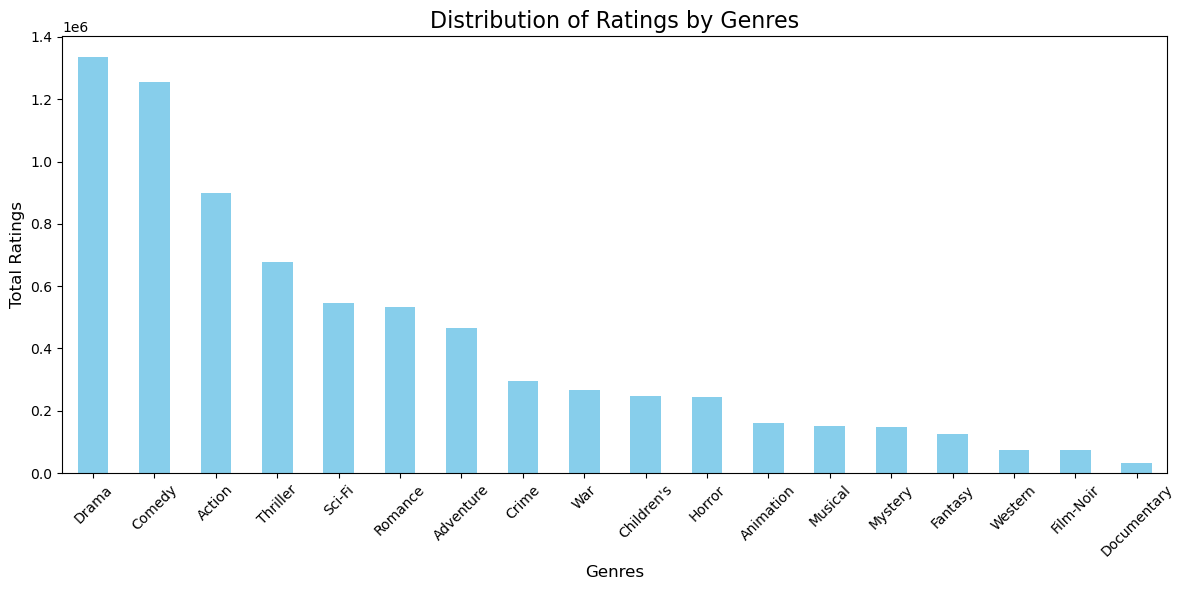

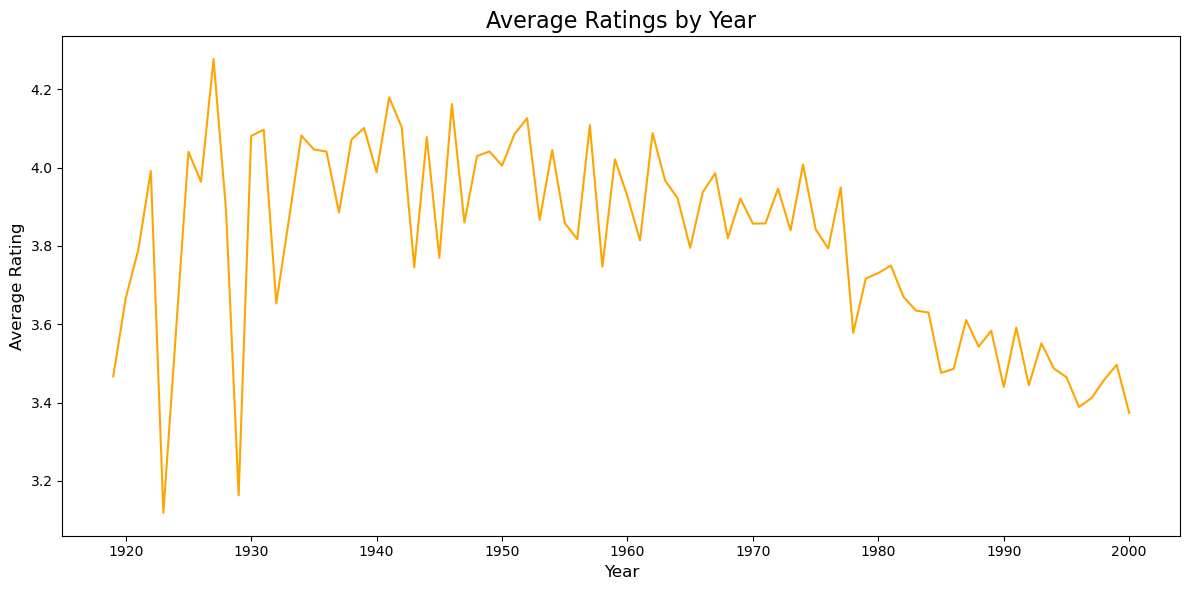

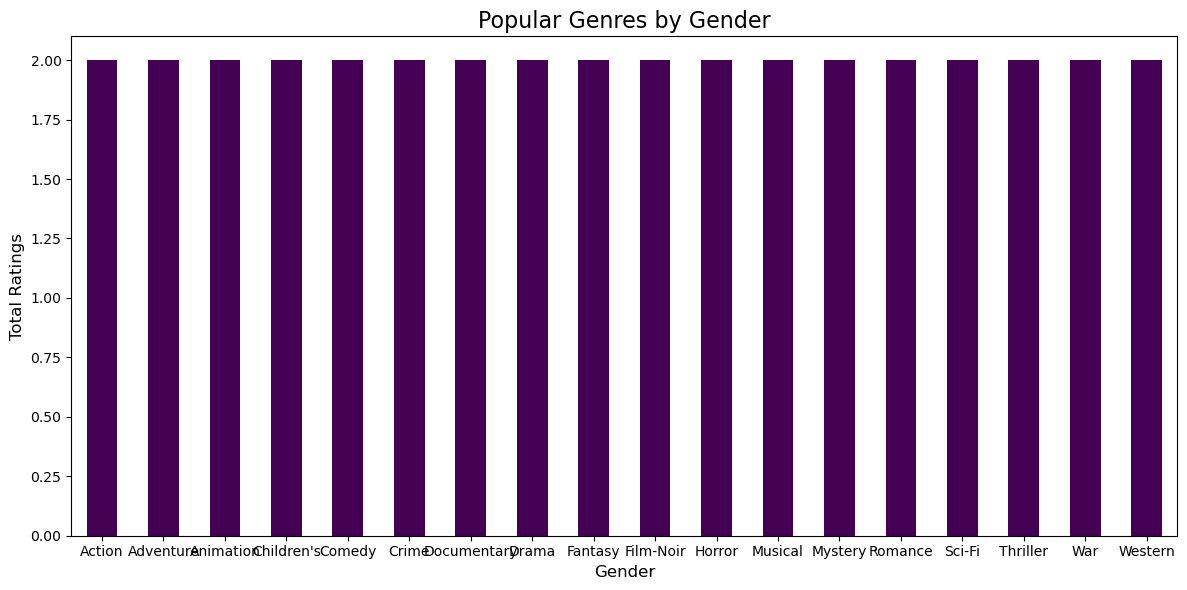

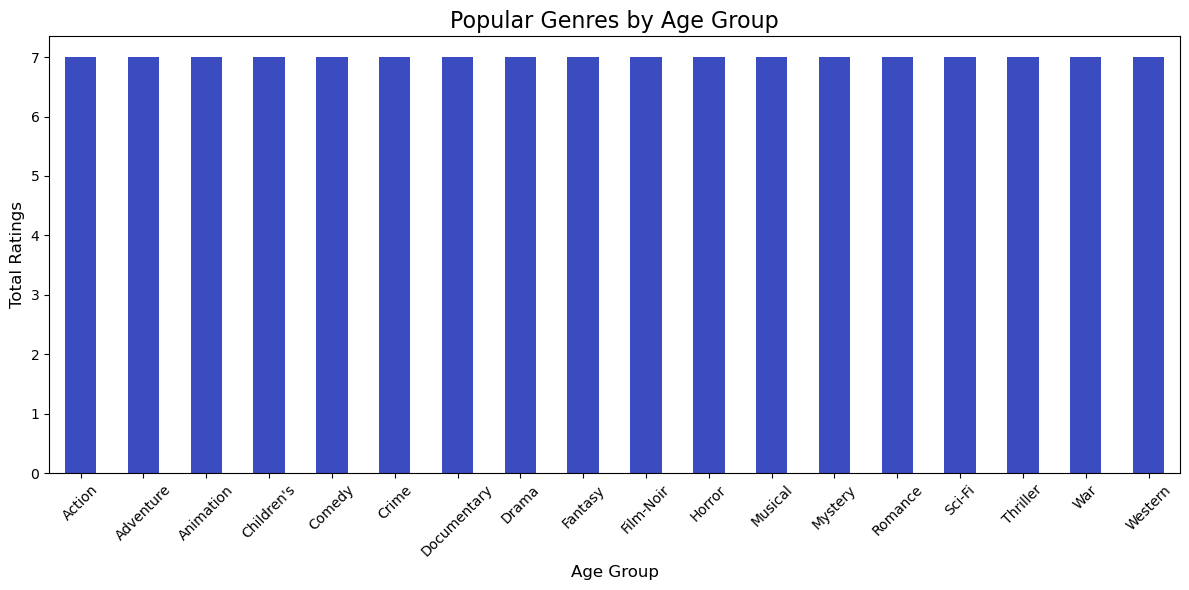

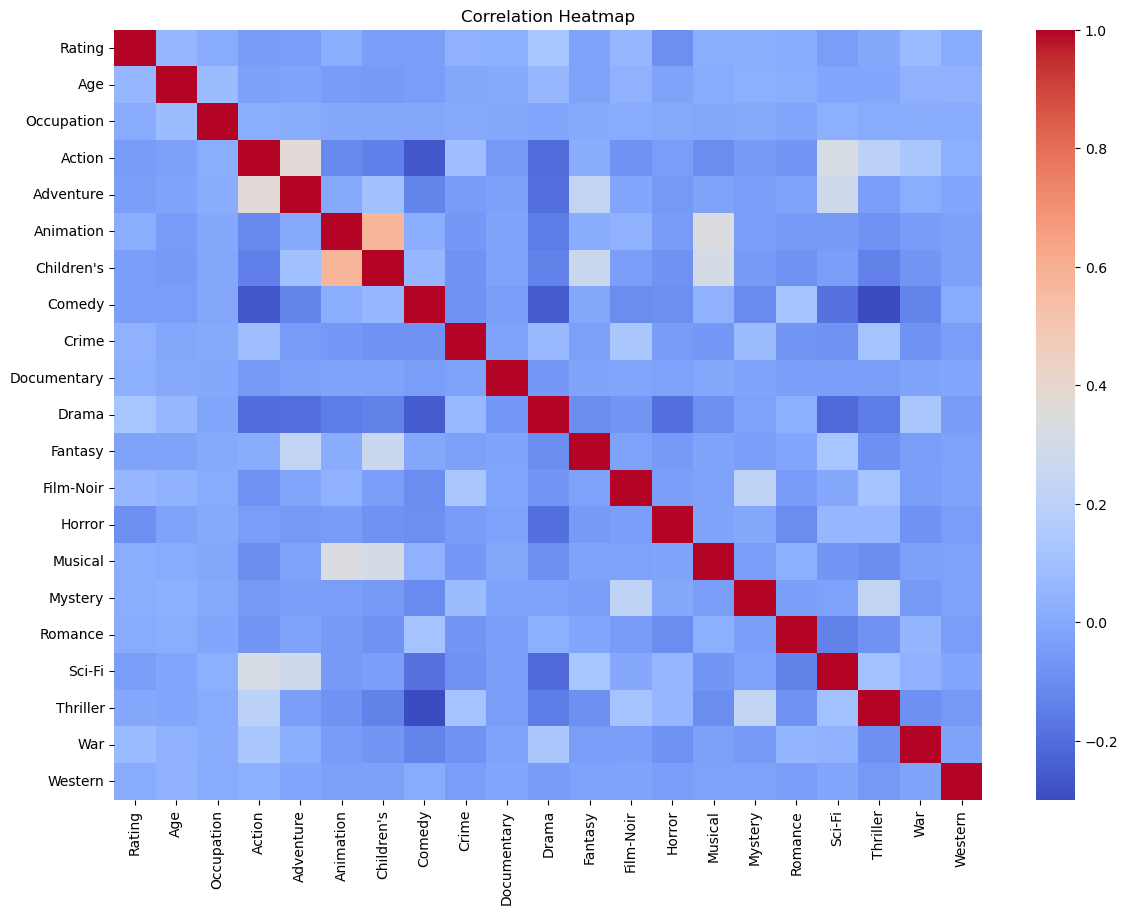

In [11]:
#Eight Solution : Dashboard Creation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data with specified encoding
ratings = pd.read_csv(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], engine='python', encoding='ISO-8859-1')
movies = pd.read_csv(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\movies.dat', sep='::', names=['MovieID', 'Title', 'Genres'], engine='python', encoding='ISO-8859-1')
users = pd.read_csv(r'C:\Users\Lenovo\Desktop\Project\ml-1m\ml-1m\users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'], engine='python', encoding='ISO-8859-1')


# Step 2: Merge datasets for analysis
merged_data = pd.merge(ratings, movies, on='MovieID')
merged_data = pd.merge(merged_data, users, on='UserID')

# Extract release year from the movie title
merged_data['Year'] = merged_data['Title'].str.extract(r'\((\d{4})\)').astype(float)

# Step 3: Distribution of Ratings by Genres and Years
plt.figure(figsize=(12, 6))
genre_ratings = merged_data['Genres'].str.get_dummies('|').multiply(merged_data['Rating'], axis=0).sum()
genre_ratings.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings by Genres', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ratings by Year
plt.figure(figsize=(12, 6))
merged_data.groupby('Year')['Rating'].mean().plot(kind='line', color='orange')
plt.title('Average Ratings by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()

# Step 4: Popular Genres by User Demographics
# Gender vs Genre Preferences
plt.figure(figsize=(12, 6))
gender_genre = merged_data.groupby('Gender')['Genres'].apply(lambda x: '|'.join(x)).str.get_dummies('|').sum()
gender_genre.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Popular Genres by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Age Group vs Genre Preferences
age_groups = {1: 'Under 18', 18: '18-24', 25: '25-34', 35: '35-44', 45: '45-49', 50: '50-55', 56: '56+'}
merged_data['AgeGroup'] = merged_data['Age'].map(age_groups)
age_genre = merged_data.groupby('AgeGroup')['Genres'].apply(lambda x: '|'.join(x)).str.get_dummies('|').sum()

plt.figure(figsize=(12, 6))
age_genre.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Popular Genres by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 1: One-hot encode the 'Genres' column
genres_dummies = merged_data['Genres'].str.get_dummies('|')

# Step 2: Prepare numerical columns for correlation analysis
numerical_columns = ['Rating', 'Age', 'Occupation']
correlation_data = pd.concat([merged_data[numerical_columns], genres_dummies], axis=1)

# Step 3: Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()